# Reynolds stress tensor


The Reynolds stress tensor
$$ R := \overline{u_i ' u_j '} = \begin{pmatrix}
			u'^2 & \overline{u'v'} & \overline{u'w'} \\
			\overline{v'u'} & v'^2 & \overline{v'w'} \\
			\overline{w'u'} & \overline{w'v'} & w'^2 
		\end{pmatrix}, \quad \textrm{with} \quad R = R^T$$
summarizes all normal and shear stresses. Based on an invariant analysis, the most important geometric properties can be derived from its eigenvalues and eigenvectors. Using a linear combination of the three eigenvalues, a two-dimensional mapping into an equilateral triangle -- called *barycentric map* (@Banerjee2007, see figure) -- with the coordinates $(x_B,y_B)$, can be constructed, which allows to characterize the anisotropy ($y_B$) and the limiting states. The three corners of the triangle represent the three limiting state 1-, 2- and 3-component limit, where the 3-component limit corresponds to isotropic turbulence. The 2-component limit represents "disk-like" turbulence associated with strong wind shear and the 1-component limit "rod-like" turbulence, which is related to wave-like motions, e.g. internal gravity waves.

<img src="../figures/schema/triangle_schema.png" width=400 />

In [1]:
#loading Reddy package
#install.packages("../src/Reddy_0.0.0.9000.tar.gz",repos=NULL,source=TRUE,quiet=TRUE)
library(Reddy)

#read in processed example data
dat=readRDS("../data/ec-data_30min_processed/processed_data_example.rds")

## Invariant analysis of the Reynolds stress tensor
### Performing the invariant analysis of the Reynolds stress tensor with `calc_anisotropy`
The function `calc_anisotropy` calculates the invariant analysis and takes for this vectors for all six independent components of the Reynolds stress tensor as input (since it is symmetric there are only six not nine independent entries) in the form
$$ R  = \begin{pmatrix}
			a_{11} & a_{12} & a_{13}\\
			a_{12} & a_{22} & a_{23} \\
			a_{13} & a_{23} & a_{33} 
		\end{pmatrix}
$$
and in the order $a_{11}, a_{12}, a_{13}, a_{22}, a_{23}, a_{33}$.

In [2]:
rey_ana = calc_anisotropy(dat$u_sd^2,dat$cov_uv,dat$cov_uw,dat$v_sd^2,dat$cov_vw,dat$w_sd^2)
str(rey_ana)

List of 6
 $ xb          : num [1:127] 0.663 0.576 0.565 0.327 0.503 ...
 $ yb          : num [1:127] 0.064 0.0682 0.0512 0.0655 0.0683 ...
 $ eta         : num [1:127] 0.238 0.218 0.22 0.175 0.204 ...
 $ xi          : num [1:127] 0.2253 0.1951 0.1947 -0.0763 0.1665 ...
 $ eigenvalues : num [1:127, 1:3] 0.467 0.422 0.424 0.298 0.385 ...
 $ eigenvectors: num [1:127, 1:3, 1:3] 0.995 0.994 0.972 0.991 0.99 ...


The output contains the coordinates of the barycentric map (`xb, yb`) and of the Lumley triangle (`eta, xi`) as well as all eigenvalues and eigenvectors.

### Plotting the barycentric map using `plot_barycentric_map`
The function `plot_barycentric_map` takes `xb, yb` as input (as calculated in the invariant analysis before) and plots them in the barycentric map.

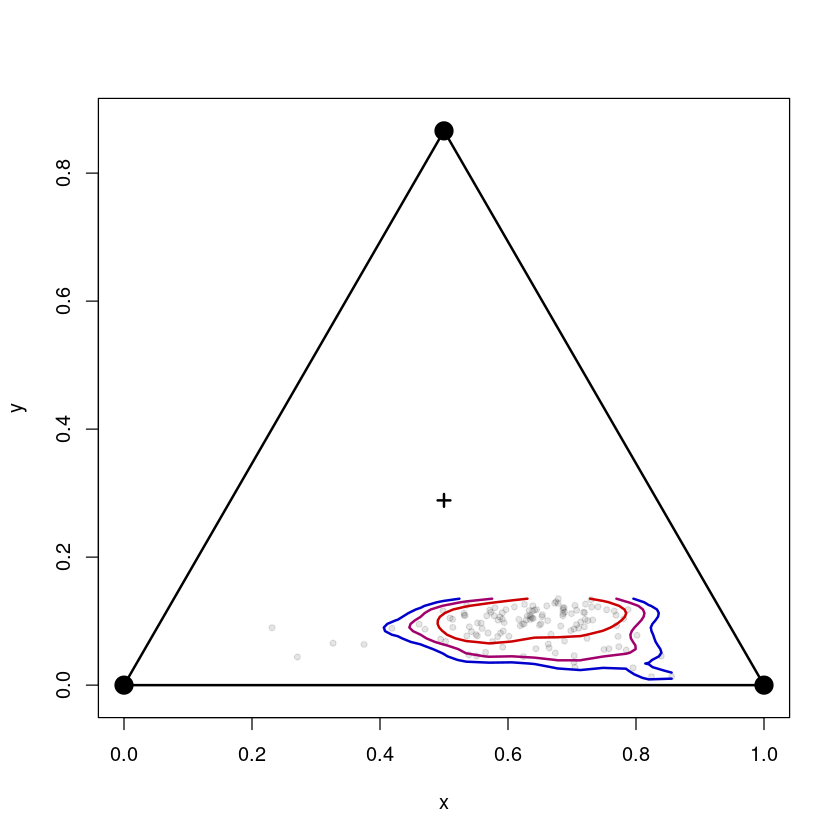

In [3]:
plot_barycentric_map(rey_ana$xb,rey_ana$yb)

The three corners of the tringle represent the three limiting state: 3-component limit (isotropic, "sphere-like") at $(0.5,\sqrt{3}/2$), 2-component limit ("disk-like") at $(0,0)$ and 1-component limit ("rod-like") at $(1,0)$. $y_B$ is a measure for anisotropy -- from $y_B = 0$ completely anisotropic to $y_B = \sqrt(3)/2$ perfectly isotropic.
Anisotropy leads to deviations from classical scaling functions used in Monin-Obukhov similarity theory, e.g. @Stiperski2019 and @Stiperski2022.

## Anisotropy and velocity aspect ratio (VAR)

The velocity aspect ratio VAR (`calc_var`) is an approximation of anisotropy that only takes the diagonal elements of the Reynolds stress tensor, i.e., $\sigma_u, \sigma_v,\sigma_w$, into account [@Mahrt2010]. A deviation from a linear regression between VAR and $y_B$ allows quantify the effect of shear stresses. As seen in the plot below, for small values of $y_B$, i.e., very anisotropic, is the deviation from the linear fit larger than for higher values of $y_B$.


Call:
lm(formula = rey_ana$yb ~ var)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0052784 -0.0018026 -0.0007742  0.0014949  0.0126992 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.050823   0.001465  -34.70   <2e-16 ***
var          0.508453   0.005097   99.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003006 on 124 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9877,	Adjusted R-squared:  0.9876 
F-statistic:  9951 on 1 and 124 DF,  p-value: < 2.2e-16



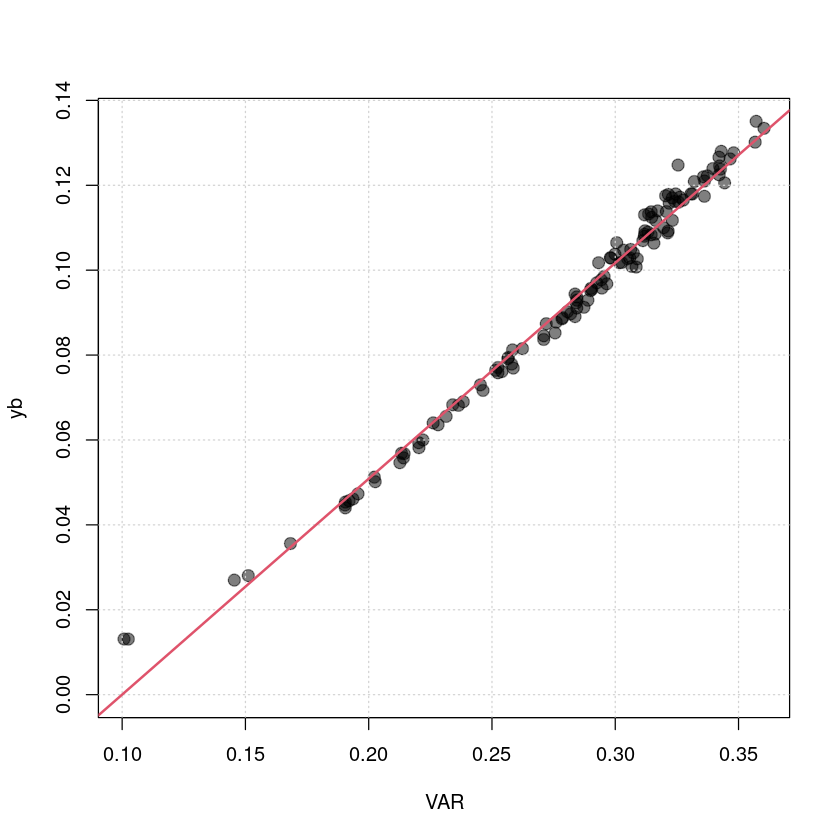

In [4]:
var=calc_var(dat$u_sd,dat$v_sd,dat$w_sd)
plot(var,rey_ana$yb,col=rgb(0,0,0,0.5),pch=20,cex=2,xlab="VAR",ylab="yb")
grid()
fit=lm(rey_ana$yb~var)
abline(fit,lwd=2,col=2)
print(summary(fit))